In [93]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

def grad_descent(derivative_func, step_func, start_point, iterations, eps):
    current_point = start_point
    for it in range(iterations):
        cur_der = derivative_func(current_point)
        step = step_func(it, cur_der, current_point)
        next_point = current_point - step * cur_der

        if np.linalg.norm(current_point-next_point) < eps:  # if dist < eps
            return current_point, it

        current_point -= step * cur_der

    return current_point, iterations

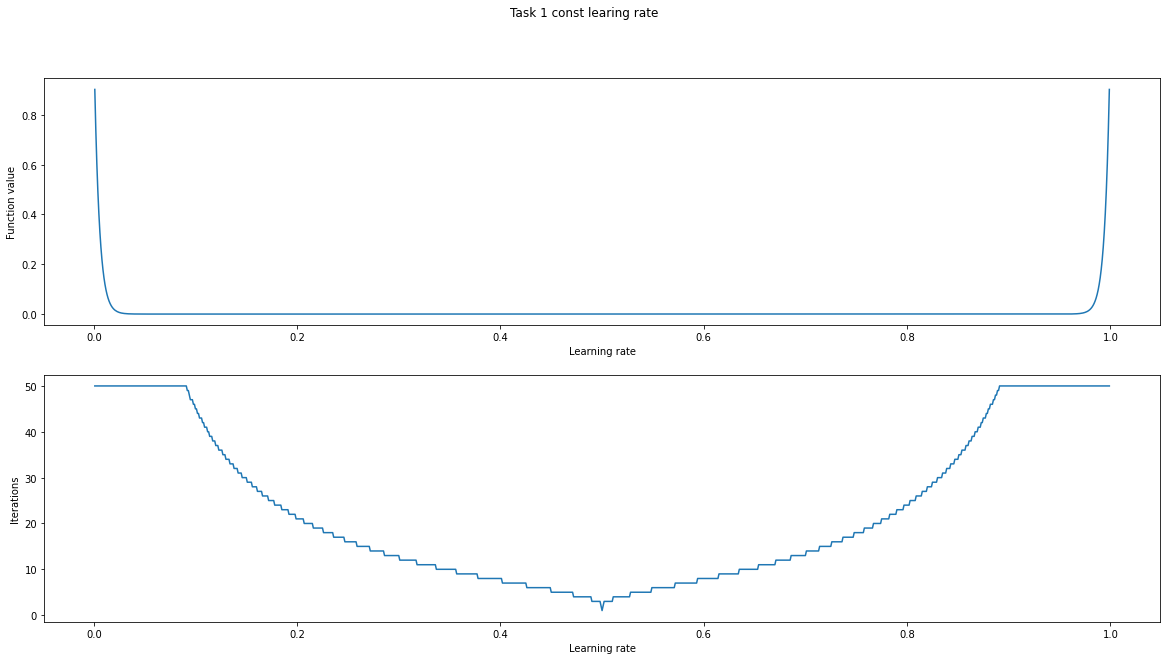

In [102]:
func = lambda xs: xs[0] ** 2  # x^2
derivative = lambda xs: np.array([2 * xs[0]])  # 2x

lrs = np.arange(0.001, 1, 0.001)
func_vals = []
its = []

start_point = np.array([1.05])

for lr in lrs:
    (xs, it) = grad_descent(
        derivative_func=derivative, 
        step_func=lambda i, _0, _1: lr,
        start_point=np.copy(start_point), 
        iterations=50,
        eps=1e-5
    )
    func_vals.append(func(xs))
    its.append(it)


fig, axs = plt.subplots(2)
fig.suptitle('Task 1 const learing rate')

axs[0].set_xlabel("Learning rate")
axs[0].set_ylabel("Function value")
axs[0].plot(lrs, func_vals)

axs[1].set_xlabel("Learning rate")
axs[1].set_ylabel("Iterations")
axs[1].plot(lrs, its)

In [103]:
def exp_learning_rate():
    return lambda i, _0, _1: math.exp(-i)


# def stair_learning_rate(value):
#     return lambda i, _0, _1: 1 / (1 + i // value)


func = lambda xs: ((xs[0] + 3) ** 2) + ((xs[1] - 5) ** 2)  # (x+3)^2+(y-5)^2
derivative = lambda xs: np.array([2 * (xs[0] + 3), 2 * (xs[1] - 5)])  # [2(x+3), 2(y-5)]

iterations = 50

start_point = np.array([10.0, -3.0])

x = grad_descent(derivative, exp_learning_rate(), start_point, iterations, 1e-5)

print(x)
func(x[0])

(array([-5.12718188,  6.309035  ]), 14)


6.238475386962884

In [104]:
def golden_section_search(func, l, r, eps):
    phi = 1.618
    current_l = l
    current_r = r
    while current_r - current_l > eps:
        diff = current_r - current_l
        candidate_l = current_r - diff / phi
        candidate_r = current_l + diff / phi
        if func(candidate_l) > func(candidate_r):
            current_l = candidate_l
        else:
            current_r = candidate_r
    return (current_l + current_r) / 2


func = lambda x: (x + 5) ** 4  # (x+5)^4

l = -100
r = 100
eps = 0.2

x = golden_section_search(func, l, r, eps)

print(x)
func(x)

-5.023931843185047


3.2802322472168953e-07

In [105]:
def create_gss_step_func(func):
    def step_func(it, cur_der, cur_point):
        def point_value(x):
            return func(cur_point - x * cur_der)
        alpha = 1.0
        l_v = point_value(0)
        prev_v = point_value(alpha)
        if l_v > prev_v:
            for i in range(10):
                alpha *= 2
                cur_v = point_value(alpha)
                if cur_v > prev_v:
                    break
                prev_v = cur_v
        return golden_section_search(point_value, 0.0, alpha, 0.1)
    return step_func

func = lambda xs: (xs[0] - 1) ** 2 + (xs[0] + xs[1]) ** 2 + 2  # (x-1)^2+(x+y)^2+2
derivative = lambda xs: np.array([2 * (xs[0] - 1) + 2 * (xs[0] + xs[1]), 2 * (xs[0] + xs[1])])  # [2*(x-1)+2*(x+y), 2*(x+y)]

iterations = 50

start_point = np.array([10.0, -3.0])

x = grad_descent(derivative, create_gss_step_func(func), start_point, iterations, 1e-5)

print(x)
func(x[0])

(array([ 0.99998406, -0.99998413]), 21)


2.000000000254193